# Pandas 시각화
판다스 자체적으로 matplotlib 를 기반으로 한 시각화기능을 지원한다.    
Series나 DataFrame에 plot() 함수나 plot accessor를 사용한다.
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## plot() 
- kind 매개변수에 지정한 값에 따라 다양한 그래프를 그릴 수 있다.
- kind : 그래프 종류 지정
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot

In [ ]:
ser.plot(kind='bar',figsize=(10,10))
ser.plot.bar(title='제목')
plt.title()
plt.xticks()

## 막대 그래프
- index가 무슨 값인지를 가리키는 축으로 사용된다.

In [3]:
tips = pd.read_csv('data/tips.csv')
tips.shape

(244, 7)

In [10]:
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

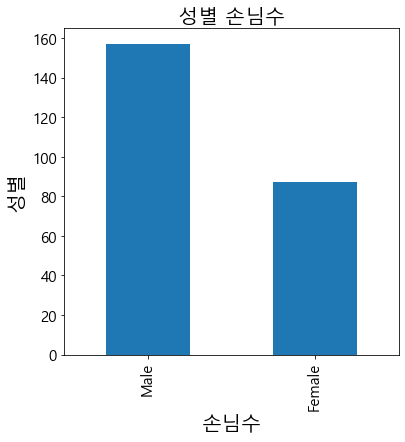

In [19]:
# 성별: 남성,여성의 수
plt.figure(figsize=(6,6))
tips['sex'].value_counts().plot(kind='bar')
# Series.bar(): index가 X축, value가 Y축
plt.title("성별 손님수")
plt.xlabel('손님수')
plt.ylabel('성별')
plt.show()

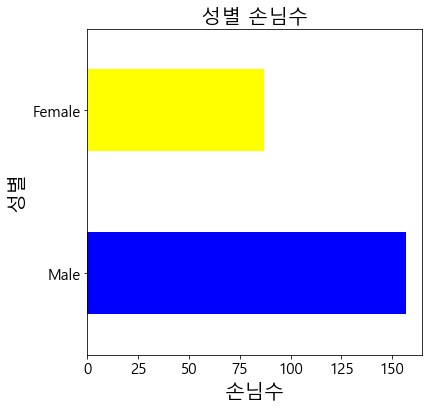

In [31]:
plt.figure(figsize=(6,6))

tips['sex'].value_counts().plot(kind='barh',color=['blue','yellow'], rot=0)

# Series.bar(): index가 X축, value가 Y축
plt.title("성별 손님수")
plt.xlabel('손님수')
plt.ylabel('성별')
plt.show()

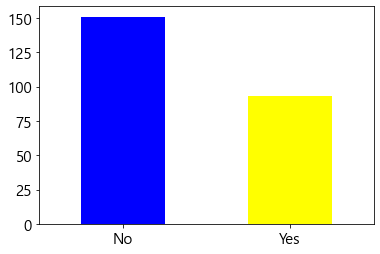

In [30]:
sm = tips['smoker'].value_counts()
sm.plot.bar(color=['blue','yellow'], rot=0)
plt.show()

- 두개의 분류 별로 그리기
    - 여러개의 컬럼일 경우 수평 누적 막대그래프를 그린다.


In [36]:
agg_df

sex,Female,Male
smoker,,
No,54,97
Yes,33,60


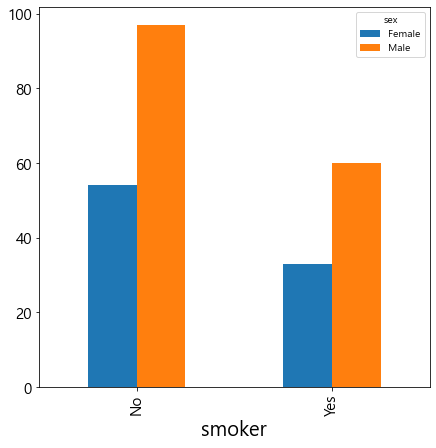

In [35]:
agg_df = tips.pivot_table(index='smoker', columns='sex', values='tip', aggfunc='count')
agg_df.plot.bar(figsize=(7,7))
plt.show()

<AxesSubplot:xlabel='day'>

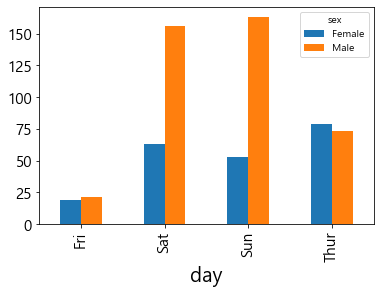

In [39]:
# 요일(day)-성별(sex) 손님의 총수(size)
# DF의 index: ticks - 1차 그룹, columns-각ticks마다 나눠져서 나옴. - 2차 그룹
tips.pivot_table(index='day', columns='sex', values='size', aggfunc='sum').plot.bar() #plot(kind='bar')

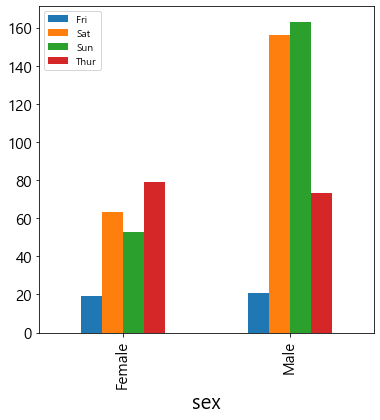

In [43]:
tips.pivot_table(index='sex', columns='day', values='size', aggfunc='sum').plot.bar(figsize=(6,6))
plt.legend(loc="upper left")
plt.show()

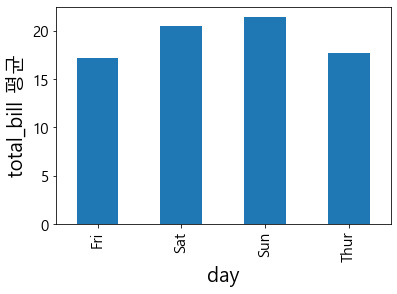

In [50]:
tips.groupby('day')['total_bill'].mean().plot.bar()
plt.ylabel('total_bill 평균')
plt.show()

## 파이차트

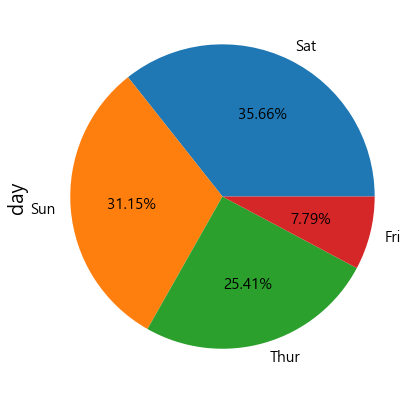

In [68]:
tips['day'].value_counts().plot.pie(figsize=(7,7), autopct="%.2f%%", fontsize=15);
plt.show()

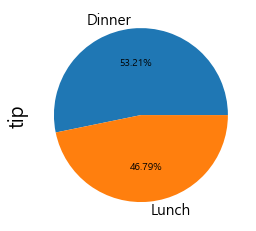

In [67]:
tips.groupby('time')['tip'].mean().plot(kind='pie', autopct='%.2f%%');

## 히스토그램, KDE(밀도그래프)

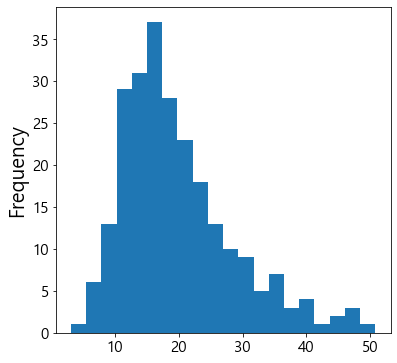

In [73]:
# tips['total_bill'].plot.hist(figsize=(6,6), bins=20)
tips['total_bill'].plot(kind='hist', figsize=(6,6), bins=20)
plt.show()

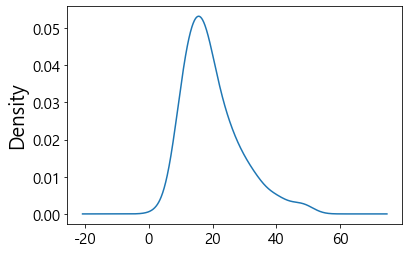

In [75]:
tips['total_bill'].plot.kde()
plt.show()

## Boxplot (상자그래프)

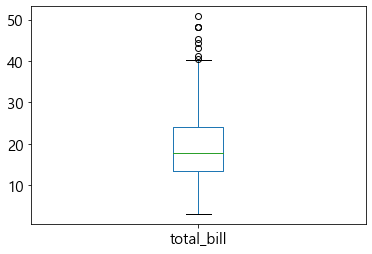

In [81]:
# series
tips['total_bill'].plot.box()#whis=3)
plt.show()

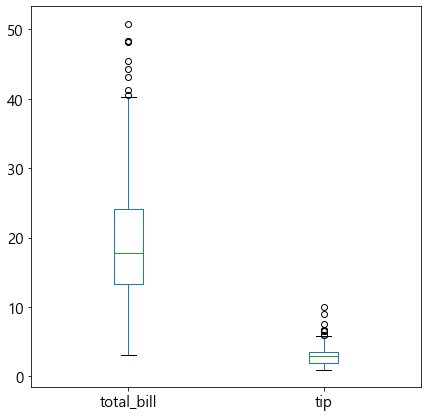

In [83]:
# DataFrame
tips[['total_bill', 'tip']].plot(kind='box', figsize=(7,7))
plt.show()

<AxesSubplot:>

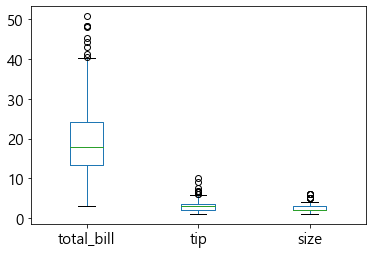

In [85]:
tips.plot(kind='box')

## scatter plot (산점도) 
- DataFrame을 이용해서만 그린다.

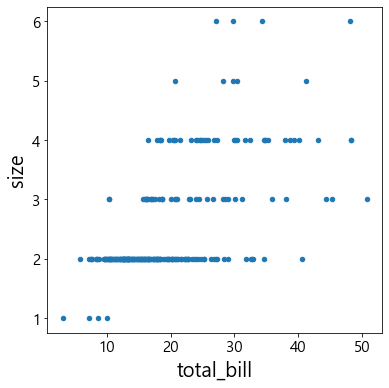

In [90]:
# tips.plot(kind='scatter', x='total_bill', y='tip', figsize=(6,6)) #x에 올 컬럼명, y에 올 컬럼명
tips.plot.scatter(x='total_bill', y='size', figsize=(6,6))
plt.show()

In [88]:
tips[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


# 파이썬의 날짜/시간 다루기
- datetime 모듈
    - datetime 클래스 - 날짜/시간
    - date: 날짜
    - time: 시간

In [1]:
import datetime # module

In [2]:
c = datetime.datetime.now() #현재(실행시점)일시를 datetime객체로 반환
c

datetime.datetime(2021, 3, 12, 9, 34, 52, 787708)

In [95]:
# 특정 일시
date = datetime.datetime(2000, 4, 5) 
date

datetime.datetime(2000, 4, 5, 0, 0)

In [3]:
date2 = datetime.datetime(2010, 5, 20, 15,32,5)
date2 = datetime.datetime.now()
date2

datetime.datetime(2021, 3, 12, 9, 37, 43, 103666)

In [108]:
print(date2.year, date2.month, date2.day, date2.hour, date2.minute, date2.second) 
print('요일:', date2.weekday()) #0: 월  6: 일

2021 3 11 16 17 3
요일: 3


In [110]:
date2.isocalendar() # (년도, 주차, 요일) #요일: 월: 1  일:7

(2021, 10, 4)

In [5]:
# datetime -> 문자열
# datetime.strftime("format문자열")
# %Y:4자리 년도, %m:월, %d:일, %H:시간(24), %M:분, %S:초 %A
# 월 ~ 초: 2자리
date2.strftime('%Y/%m/%d %H:%M:%S %A')
date2.strftime('%Y년 %m월 %d일')

'2021년 03월 12일'

In [112]:
f'{date2.year}/{date2.month}/{date2.day}'

'2021/3/11'

In [117]:
# 문자열 -> datetime
# strptime
d = datetime.datetime.strptime("2020/10/20", "%Y/%m/%d")
d

datetime.datetime(2020, 10, 20, 0, 0)

# 판다스에서 datetime 사용

In [8]:
import pandas as pd
import numpy as np
d = [datetime.datetime.now()]*10
df = pd.DataFrame({
    "age":np.random.randint(10,100,10),
    "day":d
})
df.shape

(10, 2)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   age     10 non-null     int32         
 1   day     10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int32(1)
memory usage: 248.0 bytes


dt accessor: datatime 타입의 값들을 처리하는 기능을 제공

In [10]:
# Series 타입: datetime64
df['day'].dt.year #원소별로 날짜/시간에서 원하는 항목들을 추출

0    2021
1    2021
2    2021
3    2021
4    2021
5    2021
6    2021
7    2021
8    2021
9    2021
Name: day, dtype: int64

In [137]:
df['day'].dt.dayofweek

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
Name: day, dtype: int64

In [ ]:
# day: 일, hour:시간, minute:분, second:초
# week: 주
# dayofweek: 요일 (0:월 ~ 6:일)
# dayofyear
# isocalendar() - (년, 주차, 요일)  1:월 ~ 7:일 => DataFrame

In [138]:
df['day'].dt.isocalendar()

,year,week,day
0,2021,10,4
1,2021,10,4
2,2021,10,4
3,2021,10,4
4,2021,10,4
5,2021,10,4
6,2021,10,4
7,2021,10,4
8,2021,10,4
9,2021,10,4


In [141]:
df['월'] = df['day'].dt.month

In [145]:
df['요일'] = df['day'].dt.dayofweek
df

,age,day,월,요일
0,38,2021-03-11 16:33:17.518420,3,3
1,64,2021-03-11 16:33:17.518420,3,3
2,88,2021-03-11 16:33:17.518420,3,3
3,33,2021-03-11 16:33:17.518420,3,3
4,75,2021-03-11 16:33:17.518420,3,3
5,31,2021-03-11 16:33:17.518420,3,3
6,52,2021-03-11 16:33:17.518420,3,3
7,49,2021-03-11 16:33:17.518420,3,3
8,56,2021-03-11 16:33:17.518420,3,3
9,26,2021-03-11 16:33:17.518420,3,3


In [165]:
!pip install pandas --upgrade

  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.3
    Uninstalling pandas-1.1.3:
      Successfully uninstalled pandas-1.1.3


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\Playdata\\anaconda3\\Lib\\site-packages\\~andas\\_libs\\algos.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [164]:
pd.__version__

'1.1.3'

In [142]:
df.groupby('월')['age'].mean()

,age,day,월
0,38,2021-03-11 16:33:17.518420,3
1,64,2021-03-11 16:33:17.518420,3
2,88,2021-03-11 16:33:17.518420,3
3,33,2021-03-11 16:33:17.518420,3
4,75,2021-03-11 16:33:17.518420,3
5,31,2021-03-11 16:33:17.518420,3
6,52,2021-03-11 16:33:17.518420,3
7,49,2021-03-11 16:33:17.518420,3
8,56,2021-03-11 16:33:17.518420,3
9,26,2021-03-11 16:33:17.518420,3


In [151]:
pd.concat([df, df['day'].dt.isocalendar()], axis=1)

,age,day,월,요일,year,week,day
0,38,2021-03-11 16:33:17.518420,3,3,2021,10,4
1,64,2021-03-11 16:33:17.518420,3,3,2021,10,4
2,88,2021-03-11 16:33:17.518420,3,3,2021,10,4
3,33,2021-03-11 16:33:17.518420,3,3,2021,10,4
4,75,2021-03-11 16:33:17.518420,3,3,2021,10,4
5,31,2021-03-11 16:33:17.518420,3,3,2021,10,4
6,52,2021-03-11 16:33:17.518420,3,3,2021,10,4
7,49,2021-03-11 16:33:17.518420,3,3,2021,10,4
8,56,2021-03-11 16:33:17.518420,3,3,2021,10,4
9,26,2021-03-11 16:33:17.518420,3,3,2021,10,4


In [152]:
df2 = df.set_index('day')
df2

,age,월,요일
day,,,
2021-03-11 16:33:17.518420,38,3,3
2021-03-11 16:33:17.518420,64,3,3
2021-03-11 16:33:17.518420,88,3,3
2021-03-11 16:33:17.518420,33,3,3
2021-03-11 16:33:17.518420,75,3,3
2021-03-11 16:33:17.518420,31,3,3
2021-03-11 16:33:17.518420,52,3,3
2021-03-11 16:33:17.518420,49,3,3
2021-03-11 16:33:17.518420,56,3,3


In [ ]:
# datetime 타입의 index를 생성
# pd.date_range(시작날짜, freq='변화규칙', periods='개수') #규칙적으로 증가/감소 하는 datetime값을 가지는 index를 생성

In [158]:
pd.date_range('2000/1/1', freq='M', periods=5) #2000/1/1  부터 1개월씩 증가하는 날짜 5개 생성
pd.date_range('2000/1/1', freq='MS', periods=5) 
pd.date_range('2000/1/1', freq='Y', periods=5) 
pd.date_range('2000/1/1', freq='YS', periods=5) 


# freq - 간격을 지정 문자(Y:년, M:월, D:일, H:시간, T:분, S:초)
#        YS, MS, HS, TS : 첫번째날짜/시간. S생략: 마지막
# 문자앞에 정수: 간격

DatetimeIndex(['2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [159]:
pd.date_range('2000/1/1', freq='D', periods=5) 

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq='D')

In [160]:
pd.date_range('2000/1/1', freq='5D', periods=5) 

DatetimeIndex(['2000-01-01', '2000-01-06', '2000-01-11', '2000-01-16',
               '2000-01-21'],
              dtype='datetime64[ns]', freq='5D')

In [161]:
pd.date_range('2000/1/1', freq='-5D', periods=5) 

DatetimeIndex(['2000-01-01', '1999-12-27', '1999-12-22', '1999-12-17',
               '1999-12-12'],
              dtype='datetime64[ns]', freq='-5D')

In [163]:
pd.date_range('2000/1/1', freq='5Y', periods=5) 

DatetimeIndex(['2000-12-31', '2005-12-31', '2010-12-31', '2015-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', freq='5A-DEC')

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [16]:
value = np.round(np.random.normal(5,3, size=(10,3)),2)
index = pd.date_range('2020/1/1', freq='M', periods=10)
df = pd.DataFrame(value, index=index, columns=['no1', 'no2', 'no3'])
df

,no1,no2,no3
2020-01-31,3.21,3.10,4.98
2020-02-29,2.64,8.26,8.46
2020-03-31,4.51,8.99,6.54
2020-04-30,5.61,8.20,2.90
2020-05-31,3.12,13.38,6.09
2020-06-30,-0.51,3.28,5.51
2020-07-31,5.45,4.88,7.83
2020-08-31,6.75,0.25,2.98
2020-09-30,9.89,1.73,-1.94
2020-10-31,4.73,2.35,5.18


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2020-01-31 to 2020-10-31
Freq: M
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   no1     10 non-null     float64
 1   no2     10 non-null     float64
 2   no3     10 non-null     float64
dtypes: float64(3)
memory usage: 320.0 bytes


## line plot

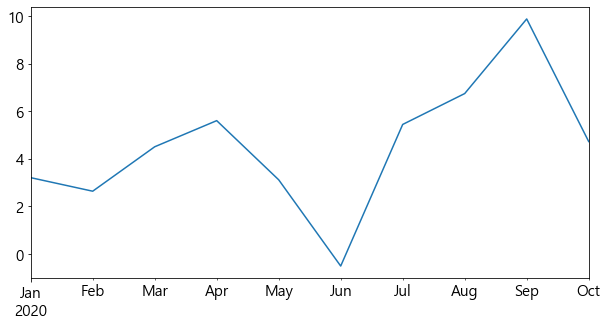

In [22]:
#Series : X-index, Y: value
# df['no1'].plot(kind='line', figsize=(10,5))
df['no1'].plot(figsize=(10,5)) #kind의 default='line'이므로 생략가능.
plt.show()

<AxesSubplot:>

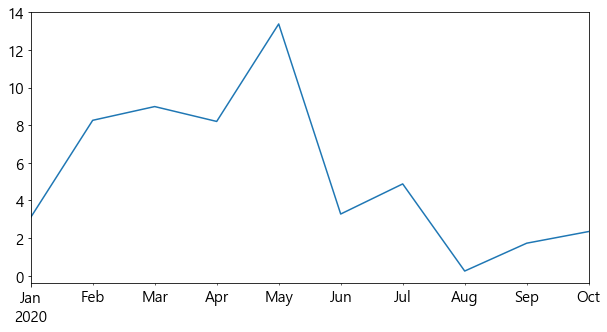

In [24]:
df['no2'].plot.line(figsize=(10,5))

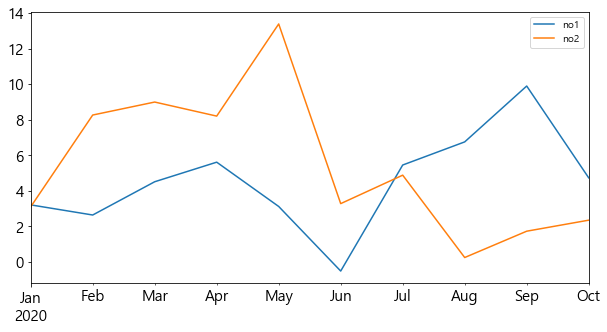

In [27]:
# DataFrame: X-index, Y-숫자형 컬럼들 - 컬럼별로 선그래프를 각각 그려준다.
df[['no1', 'no2']].plot(figsize=(10,5))
plt.show()

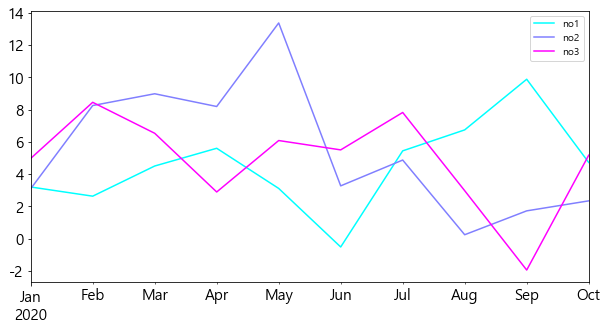

In [35]:
df.plot(figsize=(10,5), cmap='cool')
plt.show()

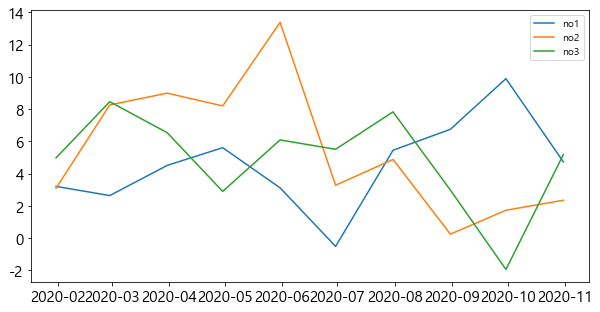

In [32]:
plt.figure(figsize=(10,5))
plt.plot(df['no1'], label='no1')
plt.plot(df['no2'], label='no2')
plt.plot(df['no3'], label='no3')
plt.legend()
plt.show()

In [40]:
df['no3_cumsum'] = df['no3'].cumsum() #누적합계
df

,no1,no2,no3,no3_cumsum
2020-01-31,3.21,3.10,4.98,4.98
2020-02-29,2.64,8.26,8.46,13.44
2020-03-31,4.51,8.99,6.54,19.98
2020-04-30,5.61,8.20,2.90,22.88
2020-05-31,3.12,13.38,6.09,28.97
2020-06-30,-0.51,3.28,5.51,34.48
2020-07-31,5.45,4.88,7.83,42.31
2020-08-31,6.75,0.25,2.98,45.29
2020-09-30,9.89,1.73,-1.94,43.35
2020-10-31,4.73,2.35,5.18,48.53


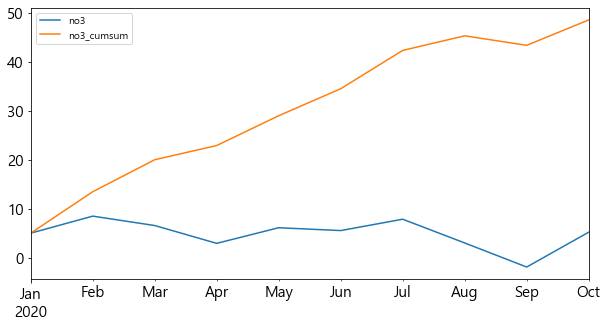

In [42]:
df[['no3', 'no3_cumsum']].plot(figsize=(10,5))
plt.show()